In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

mayya ru
geraldton au
key west us
krasnoselkup ru
bredasdorp za
ushuaia ar
ulladulla au
puerto ayora ec
kampene cd
busselton au
barentsburg sj
vaini to
taolanaro mg
yerbogachen ru
punta arenas cl
dungarpur in
petropavlovsk-kamchatskiy ru
pangody ru
bluff nz
ribeira grande pt
pemangkat id
plastun ru
mukdahan th
cherskiy ru
lagoa pt
sorvag fo
hermanus za
carnarvon au
siilinjarvi fi
bati et
montevideo uy
cape town za
busselton au
ancud cl
busselton au
surab pk
emet tr
busselton au
kerteh my
bay-khaak ru
hermanus za
kapaa us
rikitea pf
busselton au
kavieng pg
upernavik gl
ushuaia ar
lolua tv
bambous virieux mu
arcos br
launceston au
zhigansk ru
vaitupu wf
mataura pf
valparaiso mx
yellowknife ca
barentsburg sj
ushuaia ar
ilulissat gl
taolanaro mg
castro cl
tondano id
jamestown sh
kabansk ru
bontang id
cidreira br
georgetown sh
baghdad iq
constitucion cl
kavieng pg
cabo san lucas mx
dali cn
busselton au
nikolskoye ru
chokurdakh ru
bud no
bredasdorp za
marcona pe
barentsburg sj
rikitea pf
shi

cape town za
castro cl
peniche pt
thompson ca
georgetown sh
butaritari ki
illoqqortoormiut gl
hollins us
san-pedro ci
kavaratti in
punta arenas cl
tigil ru
okhotsk ru
rikitea pf
kapaa us
puerto ayora ec
berlevag no
provideniya ru
bandarbeyla so
noumea nc
araouane ml
imbituba br
ushuaia ar
ushuaia ar
butaritari ki
marcona pe
mullaitivu lk
marcona pe
ushuaia ar
carnarvon au
cabo san lucas mx
east london za
mahebourg mu
clyde nz
makakilo city us
bluff nz
arraial do cabo br
cooma au
itapora br
ribeira grande pt
santa cruz cabralia br
jian cn
key largo us
sitka us
esperance au
rikitea pf
pacific grove us
qaanaaq gl
ganta lr
punta arenas cl
bluff nz
butaritari ki
busselton au
khatanga ru
geraldton au
babanusah sd
hermanus za
nizhneyansk ru
grand centre ca
punta arenas cl
mataura pf
qinhuangdao cn
mayo ca
tabas ir
yumen cn
fortuna us
ketchikan us
hami cn
tarata pe
atar mr
usinsk ru
mataura pf
adrar dz
karratha au
hermanus za
kapaa us
guarapari br
rabat ma
bolobo cd
butaritari ki
coihaique cl


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Import the requests library.
import requests

# Import the API key
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | mayya
Processing Record 2 of Set 13 | geraldton
Processing Record 3 of Set 13 | key west
Processing Record 4 of Set 13 | krasnoselkup
Processing Record 5 of Set 13 | bredasdorp
Processing Record 6 of Set 13 | ushuaia
Processing Record 7 of Set 13 | ulladulla
Processing Record 8 of Set 13 | puerto ayora
Processing Record 9 of Set 13 | kampene
Processing Record 10 of Set 13 | busselton
Processing Record 11 of Set 13 | barentsburg
City not found. Skipping...
Processing Record 12 of Set 13 | vaini
Processing Record 13 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 13 | yerbogachen
Processing Record 15 of Set 13 | punta arenas
Processing Record 16 of Set 13 | dungarpur
Processing Record 17 of Set 13 | petropavlovsk-kamchatskiy
Processing Record 18 of Set 13 | pangody
Processing Record 19 of Set 13 | bluff
Processing Record 20 of Set 13 | ribeira grande
Processing Record

Processing Record 30 of Set 16 | torbay
Processing Record 31 of Set 16 | port lincoln
Processing Record 32 of Set 16 | hualmay
Processing Record 33 of Set 16 | khalkhal
Processing Record 34 of Set 16 | mezen
Processing Record 35 of Set 16 | ichinohe
Processing Record 36 of Set 16 | hofn
Processing Record 37 of Set 16 | galgani
City not found. Skipping...
Processing Record 38 of Set 16 | rotterdam
Processing Record 39 of Set 16 | korla
Processing Record 40 of Set 16 | fria
Processing Record 41 of Set 16 | bethel
Processing Record 42 of Set 16 | eureka
Processing Record 43 of Set 16 | east london
Processing Record 44 of Set 16 | mattru
Processing Record 45 of Set 16 | dongzhen
Processing Record 46 of Set 16 | amderma
City not found. Skipping...
Processing Record 47 of Set 16 | monzon
Processing Record 48 of Set 16 | atar
Processing Record 49 of Set 16 | sisimiut
Processing Record 50 of Set 16 | knysna
Processing Record 1 of Set 17 | mys shmidta
City not found. Skipping...
Processing Reco

Processing Record 17 of Set 20 | kirakira
Processing Record 18 of Set 20 | baherden
Processing Record 19 of Set 20 | kupang
Processing Record 20 of Set 20 | dabakala
Processing Record 21 of Set 20 | makakilo city
Processing Record 22 of Set 20 | kuche
City not found. Skipping...
Processing Record 23 of Set 20 | port hawkesbury
Processing Record 24 of Set 20 | wuxi
Processing Record 25 of Set 20 | kalevala
Processing Record 26 of Set 20 | portsmouth
Processing Record 27 of Set 20 | mubi
Processing Record 28 of Set 20 | tezu
Processing Record 29 of Set 20 | sao joao da barra
Processing Record 30 of Set 20 | grindavik
Processing Record 31 of Set 20 | fairbanks
Processing Record 32 of Set 20 | katherine
Processing Record 33 of Set 20 | butembo
Processing Record 34 of Set 20 | guymon
Processing Record 35 of Set 20 | faya
Processing Record 36 of Set 20 | axim
Processing Record 37 of Set 20 | bonfim
Processing Record 38 of Set 20 | hachinohe
Processing Record 39 of Set 20 | verkhnyaya inta
Pr

Processing Record 5 of Set 24 | comodoro rivadavia
Processing Record 6 of Set 24 | taoudenni
Processing Record 7 of Set 24 | poum
Processing Record 8 of Set 24 | akkermanovka
Processing Record 9 of Set 24 | shelopugino
Processing Record 10 of Set 24 | brae
Processing Record 11 of Set 24 | bagaces
Processing Record 12 of Set 24 | usevya
Processing Record 13 of Set 24 | chikoy
City not found. Skipping...
Processing Record 14 of Set 24 | finnsnes
Processing Record 15 of Set 24 | tabiauea
City not found. Skipping...
Processing Record 16 of Set 24 | verkhovyna
Processing Record 17 of Set 24 | kalianget
Processing Record 18 of Set 24 | bozoum
Processing Record 19 of Set 24 | basudebpur
Processing Record 20 of Set 24 | dunedin
Processing Record 21 of Set 24 | gambo
Processing Record 22 of Set 24 | datong
Processing Record 23 of Set 24 | omsukchan
Processing Record 24 of Set 24 | houston
Processing Record 25 of Set 24 | touros
Processing Record 26 of Set 24 | altar
Processing Record 27 of Set 

In [11]:
len(city_data)

574

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mayya,61.7333,130.2811,72.72,29,61,3.04,RU,2021-06-14 05:24:11
1,Geraldton,-28.7667,114.6000,70.21,64,40,18.41,AU,2021-06-14 05:24:12
2,Key West,24.5557,-81.7826,82.99,78,1,12.66,US,2021-06-14 05:23:44
3,Krasnoselkup,65.7000,82.4667,70.21,51,60,13.96,RU,2021-06-14 05:24:13
4,Bredasdorp,-34.5322,20.0403,47.28,93,1,5.75,ZA,2021-06-14 05:24:13
5,Ushuaia,-54.8000,-68.3000,37.06,65,90,9.22,AR,2021-06-14 05:20:28
6,Ulladulla,-35.3500,150.4667,61.88,69,50,4.81,AU,2021-06-14 05:24:14
7,Puerto Ayora,-0.7393,-90.3518,72.50,75,96,9.10,EC,2021-06-14 05:24:14
8,Kampene,-3.6000,26.6667,70.77,68,84,2.10,CD,2021-06-14 05:24:14
9,Busselton,-33.6500,115.3333,56.08,62,91,22.62,AU,2021-06-14 05:24:15


In [13]:
new_column_reorder = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_reorder]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mayya,RU,2021-06-14 05:24:11,61.7333,130.2811,72.72,29,61,3.04
1,Geraldton,AU,2021-06-14 05:24:12,-28.7667,114.6000,70.21,64,40,18.41
2,Key West,US,2021-06-14 05:23:44,24.5557,-81.7826,82.99,78,1,12.66
3,Krasnoselkup,RU,2021-06-14 05:24:13,65.7000,82.4667,70.21,51,60,13.96
4,Bredasdorp,ZA,2021-06-14 05:24:13,-34.5322,20.0403,47.28,93,1,5.75


In [7]:
# Create the output file (CSV).
city_data_df = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(r'C:\Users\wendy\Desktop\GITHub\World_Weather_Analysis\weather_data\city_data.csv', index_label='City_ID')

AttributeError: 'str' object has no attribute 'to_csv'

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

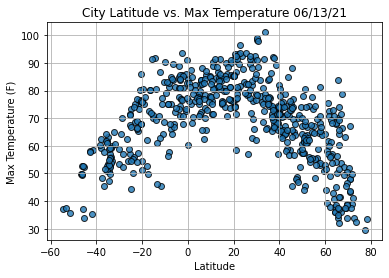

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

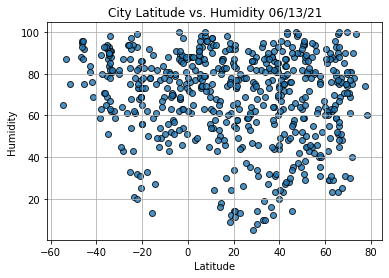

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

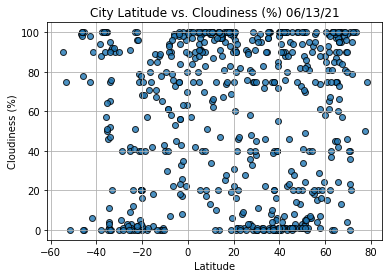

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

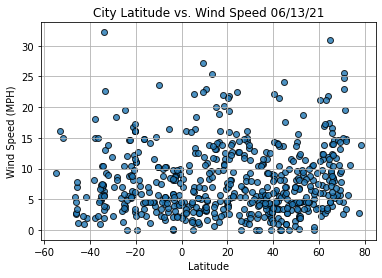

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                    Dungarpur
Country                        IN
Date          2021-06-14 05:24:17
Lat                       23.8333
Lng                       73.7167
Max Temp                     92.5
Humidity                       45
Cloudiness                      8
Wind Speed                  15.68
Name: 13, dtype: object

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mayya,RU,2021-06-14 05:24:11,61.7333,130.2811,72.72,29,61,3.04
2,Key West,US,2021-06-14 05:23:44,24.5557,-81.7826,82.99,78,1,12.66
3,Krasnoselkup,RU,2021-06-14 05:24:13,65.7000,82.4667,70.21,51,60,13.96
11,Yerbogachen,RU,2021-06-14 05:24:16,61.2767,108.0108,61.72,61,99,7.34
13,Dungarpur,IN,2021-06-14 05:24:17,23.8333,73.7167,92.50,45,8,15.68


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

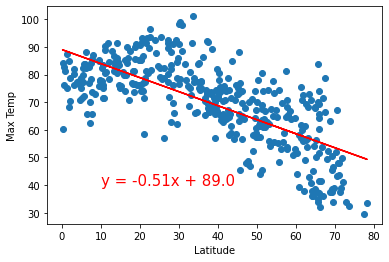

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


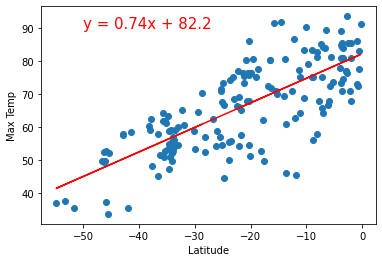

In [25]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

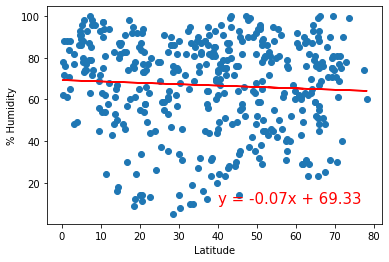

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

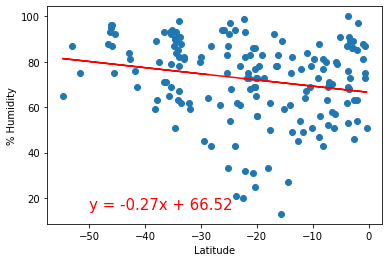

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

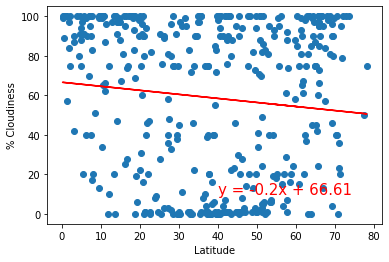

In [28]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

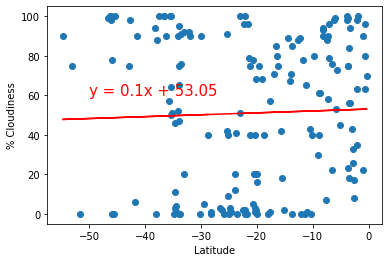

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

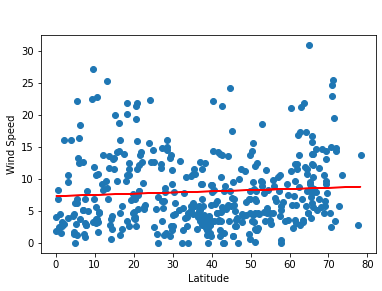

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

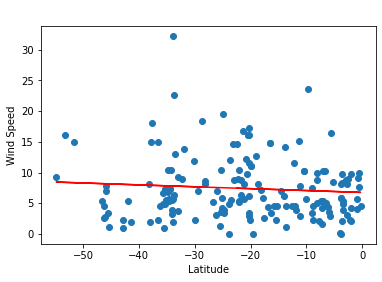

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))